<a href="https://colab.research.google.com/github/brendaFlavia/DataVisualization/blob/main/Text_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
# Import libraries
import pandas as pd
from nltk.tokenize import sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora, models
from gensim.parsing.preprocessing import STOPWORDS
import nltk
import numpy as np
import spacy
from spacy import displacy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pathlib
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

**Set path for dataset**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

#train and Validation data directory 
data_dir = pathlib.Path('/content/gdrive/My Drive/Data Visualization/Comments.xlsx') 

Mounted at /content/gdrive


In [3]:
#def load_data():
comment_data = pd.read_excel(data_dir)
    #return data

Disaply first five information

In [4]:
comment_data.head()


comment_id  \
0           5   
1          41   
2          49   
3          50   
4          52   

                                                                                               Comment  
0                                                                               djfjkdfjkjkffdk edited  
1  Faith has exhibited enthusiasm in taking on the project at hand. She has already shown promising...  
2  He now has now understood the structure of grails and how different components relate. Understan...  
3  The Intern was oriented on ICT setup and Infrastructure of Soroti University, drafted workplan a...  
4  The student was oriented on the organization structure, developed workplan for the 4 week intern...

Print shape  of the dataset

In [5]:
print('Dataset size:',comment_data.shape)

Dataset size: (4084, 2)


In [6]:
print('Columns are:',comment_data.columns)

Columns are: Index(['comment_id', 'Comment'], dtype='object')


Display information about the comments

In [7]:
comment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4084 entries, 0 to 4083
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   comment_id  4084 non-null   int64 
 1   Comment     4083 non-null   object
dtypes: int64(1), object(1)
memory usage: 63.9+ KB


In [34]:
comment_data['Comment']=comment_data['Comment'].astype(str)

In [8]:
text = ''

for words in comment_data['Comment']:  
    text += str(words)
print(text)

djfjkdfjkjkffdk editedFaith has exhibited enthusiasm in taking on the project at hand. She has already shown promising signs in understanding the core concepts of software engineering. I look forward discovering more as time goes on.He now has now understood the structure of grails and how different components relate. Understands the process of getting API's from MTNThe Intern was oriented on ICT setup and Infrastructure of Soroti University, drafted workplan and started off the Internship. Simon was encouraged to take the Internship seriously as there was a lot to learn.The student was oriented on the organization structure, developed workplan for the 4 week internship and participated in assessment of printers for servicing.  He acquired both technical and teamwork skills at workplace.Activities well completedfinished on timeThe student's weekly progress was justifiably good, characterized with enthusiasm to learning more.NotedShe found this very interesting as she was able to identi

In [14]:
tokenized_text=nltk.sent_tokenize(text)

print(tokenized_text)

['djfjkdfjkjkffdk editedFaith has exhibited enthusiasm in taking on the project at hand.', 'She has already shown promising signs in understanding the core concepts of software engineering.', 'I look forward discovering more as time goes on.He now has now understood the structure of grails and how different components relate.', "Understands the process of getting API's from MTNThe Intern was oriented on ICT setup and Infrastructure of Soroti University, drafted workplan and started off the Internship.", 'Simon was encouraged to take the Internship seriously as there was a lot to learn.The student was oriented on the organization structure, developed workplan for the 4 week internship and participated in assessment of printers for servicing.', "He acquired both technical and teamwork skills at workplace.Activities well completedfinished on timeThe student's weekly progress was justifiably good, characterized with enthusiasm to learning more.NotedShe found this very interesting as she wa

In [10]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [13]:
tokenized_text=nltk.sent_tokenize(text)

print(tokenized_text)

['djfjkdfjkjkffdk editedFaith has exhibited enthusiasm in taking on the project at hand.', 'She has already shown promising signs in understanding the core concepts of software engineering.', 'I look forward discovering more as time goes on.He now has now understood the structure of grails and how different components relate.', "Understands the process of getting API's from MTNThe Intern was oriented on ICT setup and Infrastructure of Soroti University, drafted workplan and started off the Internship.", 'Simon was encouraged to take the Internship seriously as there was a lot to learn.The student was oriented on the organization structure, developed workplan for the 4 week internship and participated in assessment of printers for servicing.', "He acquired both technical and teamwork skills at workplace.Activities well completedfinished on timeThe student's weekly progress was justifiably good, characterized with enthusiasm to learning more.NotedShe found this very interesting as she wa

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['djfjkdfjkjkffdk', 'editedFaith', 'has', 'exhibited', 'enthusiasm', 'in', 'taking', 'on', 'the', 'project', 'at', 'hand', '.', 'She', 'has', 'already', 'shown', 'promising', 'signs', 'in', 'understanding', 'the', 'core', 'concepts', 'of', 'software', 'engineering', '.', 'I', 'look', 'forward', 'discovering', 'more', 'as', 'time', 'goes', 'on.He', 'now', 'has', 'now', 'understood', 'the', 'structure', 'of', 'grails', 'and', 'how', 'different', 'components', 'relate', '.', 'Understands', 'the', 'process', 'of', 'getting', 'API', "'s", 'from', 'MTNThe', 'Intern', 'was', 'oriented', 'on', 'ICT', 'setup', 'and', 'Infrastructure', 'of', 'Soroti', 'University', ',', 'drafted', 'workplan', 'and', 'started', 'off', 'the', 'Internship', '.', 'Simon', 'was', 'encouraged', 'to', 'take', 'the', 'Internship', 'seriously', 'as', 'there', 'was', 'a', 'lot', 'to', 'learn.The', 'student', 'was', 'oriented', 'on', 'the', 'organization', 'structure', ',', 'developed', 'workplan', 'for', 'the', '4', 'week

In [ ]:
#Frequency Distribution

In [17]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 8875 samples and 89920 outcomes>


In [18]:
fdist.most_common(2)

[('the', 4043), ('to', 3640)]

In [ ]:
#Frequency Distribution plot

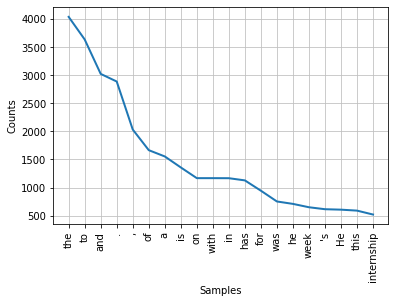

In [19]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(20,cumulative=False)
plt.show()

In [ ]:
#remove stop words

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'whom', 'an', 'didn', 'm', "isn't", 'needn', 'shan', 're', 'itself', 'doing', 'between', 'at', 'during', 'it', 'so', 'i', 'by', 'some', 'but', "wouldn't", 'not', "you've", 'we', "didn't", "needn't", 'which', 'same', 'doesn', 'don', 'were', 'most', 'each', "hadn't", 'then', 'out', 'now', 'after', 'his', 'you', 'yourselves', 'other', 'weren', 'any', 'him', 'they', 'off', 'what', 'are', 'its', 'them', 'once', 'she', 'll', 'no', "hasn't", 'won', 'am', 'ain', "you're", 'just', 'o', 'wasn', 'wouldn', 'themselves', 'of', 'such', 't', 'with', 'aren', 'have', 'does', 'shouldn', "mightn't", 'haven', 'against', "you'd", 'there', 'had', 'your', 'under', 'where', 'why', "wasn't", "it's", 'to', 'should', 'ma', 'y', 'when', "couldn't", 'd', "shouldn't", 'being', 'before', 'our', 'up', 'me', 'having', "don't", 'yourself', 'than', 'herself', 'for', 'very', 'further', 'and', 'is', "weren't", 'be', 'mightn', 'the', 'if', "won't", 'only', 'below', 'nor', 'too', 'all', 'until', 'how', "shan't", "she's", '

In [ ]:
filtered_sent=[]
for w in tokenized_text:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_text)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['djfjkdfjkjkffdk editedFaith has exhibited enthusiasm in taking on the project at hand.', 'She has already shown promising signs in understanding the core concepts of software engineering.', 'I look forward discovering more as time goes on.He now has now understood the structure of grails and how different components relate.', "Understands the process of getting API's from MTNThe Intern was oriented on ICT setup and Infrastructure of Soroti University, drafted workplan and started off the Internship.", 'Simon was encouraged to take the Internship seriously as there was a lot to learn.The student was oriented on the organization structure, developed workplan for the 4 week internship and participated in assessment of printers for servicing.', "He acquired both technical and teamwork skills at workplace.Activities well completedfinished on timeThe student's weekly progress was justifiably good, characterized with enthusiasm to learning more.NotedShe found this very i

In [ ]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['djfjkdfjkjkffdk editedFaith has exhibited enthusiasm in taking on the project at hand.', 'She has already shown promising signs in understanding the core concepts of software engineering.', 'I look forward discovering more as time goes on.He now has now understood the structure of grails and how different components relate.', "Understands the process of getting API's from MTNThe Intern was oriented on ICT setup and Infrastructure of Soroti University, drafted workplan and started off the Internship.", 'Simon was encouraged to take the Internship seriously as there was a lot to learn.The student was oriented on the organization structure, developed workplan for the 4 week internship and participated in assessment of printers for servicing.', "He acquired both technical and teamwork skills at workplace.Activities well completedfinished on timeThe student's weekly progress was justifiably good, characterized with enthusiasm to learning more.NotedShe found this very in

In [ ]:
import nltk
nltk.download('wordnet')

nltk.download('omw-1.4')
  

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#Lexicon Normalization
#performing stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


In [ ]:
tokens=nltk.word_tokenize(text)
print(tokens)

['djfjkdfjkjkffdk', 'editedFaith', 'has', 'exhibited', 'enthusiasm', 'in', 'taking', 'on', 'the', 'project', 'at', 'hand', '.', 'She', 'has', 'already', 'shown', 'promising', 'signs', 'in', 'understanding', 'the', 'core', 'concepts', 'of', 'software', 'engineering', '.', 'I', 'look', 'forward', 'discovering', 'more', 'as', 'time', 'goes', 'on.He', 'now', 'has', 'now', 'understood', 'the', 'structure', 'of', 'grails', 'and', 'how', 'different', 'components', 'relate', '.', 'Understands', 'the', 'process', 'of', 'getting', 'API', "'s", 'from', 'MTNThe', 'Intern', 'was', 'oriented', 'on', 'ICT', 'setup', 'and', 'Infrastructure', 'of', 'Soroti', 'University', ',', 'drafted', 'workplan', 'and', 'started', 'off', 'the', 'Internship', '.', 'Simon', 'was', 'encouraged', 'to', 'take', 'the', 'Internship', 'seriously', 'as', 'there', 'was', 'a', 'lot', 'to', 'learn.The', 'student', 'was', 'oriented', 'on', 'the', 'organization', 'structure', ',', 'developed', 'workplan', 'for', 'the', '4', 'week

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.pos_tag(tokens)

[('djfjkdfjkjkffdk', 'NN'),
 ('editedFaith', 'NN'),
 ('has', 'VBZ'),
 ('exhibited', 'VBN'),
 ('enthusiasm', 'NN'),
 ('in', 'IN'),
 ('taking', 'VBG'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('project', 'NN'),
 ('at', 'IN'),
 ('hand', 'NN'),
 ('.', '.'),
 ('She', 'PRP'),
 ('has', 'VBZ'),
 ('already', 'RB'),
 ('shown', 'VBN'),
 ('promising', 'JJ'),
 ('signs', 'NNS'),
 ('in', 'IN'),
 ('understanding', 'VBG'),
 ('the', 'DT'),
 ('core', 'NN'),
 ('concepts', 'NNS'),
 ('of', 'IN'),
 ('software', 'NN'),
 ('engineering', 'NN'),
 ('.', '.'),
 ('I', 'PRP'),
 ('look', 'VBP'),
 ('forward', 'RB'),
 ('discovering', 'VBG'),
 ('more', 'RBR'),
 ('as', 'IN'),
 ('time', 'NN'),
 ('goes', 'VBZ'),
 ('on.He', 'RB'),
 ('now', 'RB'),
 ('has', 'VBZ'),
 ('now', 'RB'),
 ('understood', 'VBN'),
 ('the', 'DT'),
 ('structure', 'NN'),
 ('of', 'IN'),
 ('grails', 'NNS'),
 ('and', 'CC'),
 ('how', 'WRB'),
 ('different', 'JJ'),
 ('components', 'NNS'),
 ('relate', 'VBP'),
 ('.', '.'),
 ('Understands', 'VBZ'),
 ('the', 'DT'),
 ('proc

In [ ]:
comment_data.Comment.value_counts()

Progressive                                                                                                                                                                                                                                                                                                                              136
Very Good                                                                                                                                                                                                                                                                                                                                 25
Does not require constant supervision.\nHas had no unscheduled absences, except for documented emergencies.\nMaintains good working relationships with coworkers.\nUsually adjusts well to changes in the work place.\nTakes messages, writes correspondence, deals with customers and coworkers with sufficient attention to detail.     23
-

In [22]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

To clean textual data, we call our custom ‘clean_text’ function that performs several transformations:

lower the text
tokenize the text (split the text into words) and remove the punctuation
remove useless words that contain numbers
remove useless stop words like ‘the’, ‘a’ ,’this’ etc.
Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database
lemmatize the text: transform every word into their root form (e.g. rooms -> room, slept -> sleep)
</ul>
Now that we have cleaned our data, we can do some feature engineering for our modelization part.

In [26]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_Comment(data):
    # lower text in data
    data = data.lower()
    # tokenize text and remove puncutation
    data = [word.strip(string.punctuation) for word in data.split(" ")]
    # remove words that contain numbers
    data = [word for word in data if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    data = [x for x in data if x not in stop]
    # remove empty tokens
    data = [t for t in data if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(data)
    # lemmatize text
    data = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    data = [t for t in data if len(t) > 1]
    # join all
    data = " ".join(data)
    return(data)

In [37]:
# clean text data
comment_data["clean_comment"] = comment_data['Comment'].apply(lambda x: clean_Comment(x))


In [36]:
comment_data.head()

comment_id  \
0           5   
1          41   
2          49   
3          50   
4          52   

                                                                                               Comment  \
0                                                                               djfjkdfjkjkffdk edited   
1  Faith has exhibited enthusiasm in taking on the project at hand. She has already shown promising...   
2  He now has now understood the structure of grails and how different components relate. Understan...   
3  The Intern was oriented on ICT setup and Infrastructure of Soroti University, drafted workplan a...   
4  The student was oriented on the organization structure, developed workplan for the 4 week intern...   

                                                                                          review_clean  
0                                                                                 djfjkdfjkjkffdk edit  
1  faith exhibit enthusiasm take project hand already show promising sign understand core concept s...  
2              understood structure grail different component relate understands process get api's mtn  
3  intern orient ict setup infrastructure soroti university draft workplan start internship simon e...  
4  student orient organization structure develop workplan week internship participate assessment pr...

In [32]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Tokenize the comments 

Let’s tokenize each sentence into a list of words

In [38]:
result = []
for sentence in comment_data["clean_comment"]:
     tokens = [word for word in sentence.split()]
     result.append(tokens)
    

In [41]:
##create dictionary based on the preprocessed_documents
dictionary = gensim.corpora.Dictionary(result)

dictionary

In [42]:
##check the dictionary
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 5:
        break

0 djfjkdfjkjkffdk
1 edit
2 already
3 concept
4 core
5 discover


In [43]:
## remove extreme words (very common and very rare)
dictionary.filter_extremes(no_below=15, no_above=0.1)

##create bag-of-word model for each documents
bow_corpus = [dictionary.doc2bow(doc) for doc in result]

In [44]:
bow_corpus

[[],
 [(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1)],
 [(14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)],
 [(11, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1)],
 [(18, 1),
  (25, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1)],
 [(37, 1)],
 [(12, 1), (38, 1)],
 [(1, 1), (23, 1), (39, 1), (40, 1)],
 [(41, 1)],
 [(42, 1), (43, 1), (44, 1), (45, 1), (46, 1)],
 [(47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1)],
 [(23, 1), (48, 1), (53, 1), (54, 1), (55, 1)],
 [(48, 1)],
 [(23, 1),
  (44, 1),
  (46, 1),
  (49, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1)],
 [(11, 1), (12, 1), (37, 1), (55, 1)],
 [(45, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(66, 1), (67, 1), (68, 1), (69, 1), (70, 1)],
 [(24, 1), (45, 1), (63, 1), (71, 1), (72, 1)],
 [(33, 1),
  (34, 1),
  (63, 1)

In [45]:
## check the bow_corpus
bow_doc_100 = bow_corpus[3]

for i in range(len(bow_doc_100)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_100[i][0], 
                                                     dictionary[bow_doc_100[i][0]], 
                                                     bow_doc_100[i][1]))

Word 11 ("take") appears 1 time.
Word 20 ("encourage") appears 1 time.
Word 21 ("ict") appears 1 time.
Word 22 ("intern") appears 1 time.
Word 23 ("learn") appears 1 time.
Word 24 ("lot") appears 1 time.
Word 25 ("orient") appears 1 time.
Word 26 ("setup") appears 1 time.
Word 27 ("start") appears 1 time.


In [46]:
bow_corpus[:5]

[[],
 [(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1)],
 [(14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)],
 [(11, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1)],
 [(18, 1),
  (25, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1)]]

In [47]:
# Human readable format of corpus (term-frequency)
[[(dictionary[id], freq) for id, freq in cp] for cp in bow_corpus[:3]]

[[],
 [('concept', 1),
  ('enthusiasm', 1),
  ('exhibit', 1),
  ('forward', 1),
  ('go', 1),
  ('hand', 1),
  ('look', 1),
  ('project', 1),
  ('show', 1),
  ('sign', 1),
  ('software', 1),
  ('take', 1),
  ('time', 1),
  ('understand', 1)],
 [('component', 1),
  ('different', 1),
  ('get', 1),
  ('process', 1),
  ('structure', 1),
  ('understood', 1)]]

We now build a model to cluster the comments

LDA’s approach to topic modeling is it considers each document as a collection of topics in a certain proportion. And each topic as a collection of keywords, again, in a certain proportion.

Once you provide the algorithm with the number of topics, all it does it to rearrange the topics distribution within the documents and keywords distribution within the topics to obtain a good composition of topic-keywords distribution.

In [48]:
lda_model = gensim.models.LdaMulticore(bow_corpus, # Stream of document vectors or sparse matrix of shape 
                                       num_topics=5, # The number of requested latent topics to be extracted from the training corpus.
                                       id2word = dictionary, #Mapping from word IDs to words. It is used to determine the vocabulary size. 
                                       passes = 50, #Number of passes through the corpus during training.
                                       workers=10) #Number of workers processes to be used for parallelization.

In [49]:
##print out the key words of five topics
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.048*"set" + 0.028*"app" + 0.028*"week's" + 0.024*"internet" + 0.023*"development" + 0.021*"manage" + 0.021*"environment" + 0.020*"project" + 0.019*"also" + 0.017*"share"


Topic: 1 
Words: 0.046*"system" + 0.033*"server" + 0.022*"network" + 0.021*"device" + 0.018*"configure" + 0.017*"design" + 0.017*"also" + 0.016*"linux" + 0.014*"software" + 0.013*"perfect"


Topic: 2 
Words: 0.037*"time" + 0.034*"skill" + 0.033*"new" + 0.028*"learn" + 0.021*"report" + 0.020*"student" + 0.019*"acquire" + 0.019*"detail" + 0.014*"finish" + 0.013*"end"


Topic: 3 
Words: 0.046*"cod" + 0.043*"encourage" + 0.036*"app" + 0.027*"end" + 0.026*"manage" + 0.026*"start" + 0.025*"go" + 0.024*"stratcom" + 0.023*"week" + 0.023*"mobile"


Topic: 4 
Words: 0.035*"week" + 0.028*"team" + 0.025*"progressive" + 0.025*"progress" + 0.017*"data" + 0.017*"keep" + 0.015*"learn" + 0.015*"great" + 0.013*"assign" + 0.012*"php"




In [50]:
documents_lda_topics = pd.DataFrame(columns = ["Excellent", "Good", "Neutral", "Poor", "Very Poor"])
for i in range(len(bow_corpus)):
    if i % 50 ==0:
        print(i)
    documents_lda_topics.loc[i] = [0] * 5

    output = lda_model.get_document_topics(bow_corpus[i])
    for j in range(len(output)):
        a = output[j][0]
        b = output[j][1]
        documents_lda_topics.iloc[i,a] = b


0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050


In [51]:
## pick the final topic for each abstract based on max-probability
for i in range(5):
    documents_lda_topics.iloc[:, i] = documents_lda_topics.iloc[:, i].astype('float64', copy=False)
    
documents_lda_topics["final_topic"] =documents_lda_topics.iloc[:, :10].idxmax(axis=1)

In [52]:
##preview the dataframe for both models
print("LDA + bow_corpus: topic probability:")
documents_lda_topics.head(5)

LDA + bow_corpus: topic probability:


Excellent      Good   Neutral      Poor  Very Poor final_topic
0   0.200000  0.200000  0.200000  0.200000   0.200000   Excellent
1   0.101798  0.013614  0.209306  0.116866   0.558415   Very Poor
2   0.028897  0.645696  0.028737  0.028978   0.267693        Good
3   0.400948  0.021036  0.345202  0.212109   0.020705   Excellent
4   0.487256  0.016876  0.461389  0.017035   0.017444   Excellent

In [57]:
result_dir = pathlib.Path('/content/gdrive/My Drive/Data Visualization/results.csv') 
final_output = comment_data.join(documents_lda_topics)
final_output.to_csv(result_dir)
final_output

comment_id  \
0              5   
1             41   
2             49   
3             50   
4             52   
...          ...   
4079        7987   
4080        7988   
4081        7993   
4082        7994   
4083        7995   

                                                                                                  Comment  \
0                                                                                  djfjkdfjkjkffdk edited   
1     Faith has exhibited enthusiasm in taking on the project at hand. She has already shown promising...   
2     He now has now understood the structure of grails and how different components relate. Understan...   
3     The Intern was oriented on ICT setup and Infrastructure of Soroti University, drafted workplan a...   
4     The student was oriented on the organization structure, developed workplan for the 4 week intern...   
...                                                                                                   ...   
4079                                                                                            Very good   
4080                                                                                            Very good   
4081                                                                                  Good report writing   
4082                                                                                             Good job   
4083  Peter has successfully finished internship. He is supposed to present end of internship report e...   

                                                                                             review_clean  \
0                                                                                    djfjkdfjkjkffdk edit   
1     faith exhibit enthusiasm take project hand already show promising sign understand core concept s...   
2                 understood structure grail different component relate understands process get api's mtn   
3     intern orient ict setup infrastructure soroti university draft workplan start internship simon e...   
4     student orient organization structure develop workplan week internship participate assessment pr...   
...                                                                                                   ...   
4079                                                                                                 good   
4080                                                                                                 good   
4081                                                                                    good report write   
4082                                                                                             good job   
4083  peter successfully finish internship suppose present end internship report explain detail new sk...   

                                                                                            clean_comment  \
0                                                                                    djfjkdfjkjkffdk edit   
1     faith exhibit enthusiasm take project hand already show promising sign understand core concept s...   
2                 understood structure grail different component relate understands process get api's mtn   
3     intern orient ict setup infrastructure soroti university draft workplan start internship simon e...   
4     student orient organization structure develop workplan week internship participate assessment pr...   
...                                                                                                   ...   
4079                                                                                                 good   
4080                                                                                                 good   
4081                                                                                    good report write   
4082                                                     

In [60]:
def get_wordcloud(topic):

  cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

  cloud = WordCloud(stopwords=STOPWORDS,
                    background_color='white',
                    width=2500,
                    height=1800,
                    max_words=10,
                    colormap='tab20',
                    color_func=lambda *args, **kwargs: cols[i],
                    prefer_horizontal=1.0)

  topics = topic.show_topics(formatted=False)

  fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

  for i, ax in enumerate(axes.flatten()):
      fig.add_subplot(ax)
      topic_words = dict(topics[i][1])
      cloud.generate_from_frequencies(topic_words, max_font_size=300)
      plt.gca().imshow(cloud)
      plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
      plt.gca().axis('off')

  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis('off')
  plt.margins(x=0, y=0)
  plt.tight_layout()
  plt.show()


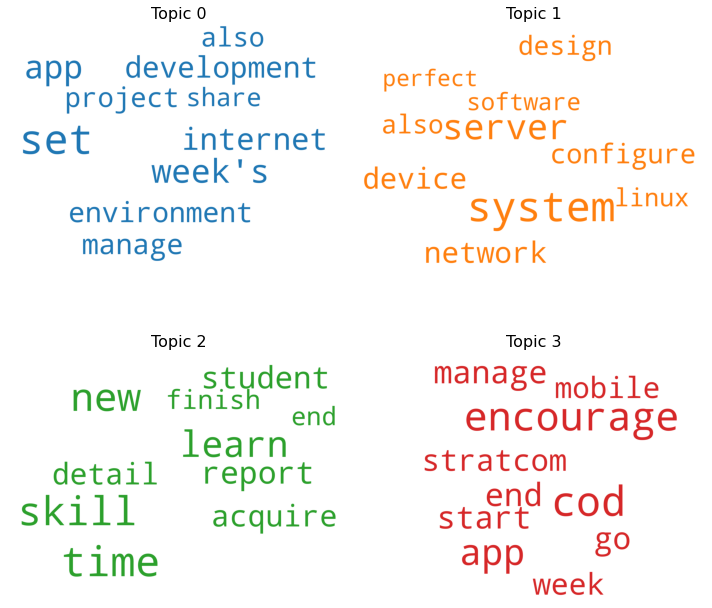

In [61]:
get_wordcloud(topic= lda_model)

In [62]:
from gensim.models import CoherenceModel# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=result, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.36000065687398436


In [ ]:
import pyLDAvis.gensim_models 
import pickle 
import pyLDAvis# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
LDAvis_prepared

In [64]:
#importing necessary libraries 

nlp = spacy.load("en_core_web_sm")  #creating an object and loading the pre-trained model for "English"

In [86]:
sentence = "Microsoft is looking at buying Uganda startup for £1 million"
  
doc = nlp(sentence)
  
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Microsoft 0 9 ORG
Uganda 31 37 GPE
£1 million 50 60 MONEY


In [87]:
for ent in doc.ents:
  print(ent.text,"|", ent.label_)

Microsoft | ORG
Uganda | GPE
£1 million | MONEY
